---

# 🎵 **SPOTITRENDS: ANALYZING GLOBAL MUSIC PATTERNS**

---

# **Introductions**

- Music is a dynamic mirror of cultural shifts, technological innovations, and listener tastes. With the surge of streaming platforms like Spotify, we now have access to extensive datasets that offer deep insights into modern music consumption.

- This dataset comprises over 33,000 Spotify tracks, each enriched with metadata—including genre, popularity scores, duration, and audio features like danceability, energy, tempo, and acousticness.

- Through careful analysis, we can uncover patterns in track popularity, identify emerging trends, and trace how musical characteristics have evolved over time.

---
# **Objectives**

The primary aim of this project is to perform an Exploratory Data Analysis (EDA) on the Spotify dataset to uncover meaningful insights. Specifically, this project will:

1. #### **Explore the Dataset**  
   Gain familiarity with the structure, features, and overall data quality.

2. #### **Analyze Music Trends**  
   Investigate how attributes like danceability, energy, and tempo have evolved over time.

3. #### **Genre Popularity Analysis**  
   Determine which genres and artists dominate the Spotify platform.

4. #### **Correlation Study**  
   Examine relationships between track popularity and key audio features.

5. #### **Visualize Findings**  
   Use informative plots and graphs to clearly present patterns, trends, and correlations.

---

## **Research Questions**

To guide this analysis, we define the following key questions:

### **Main Research Question**

* **How have music characteristics and trends evolved on Spotify over the years, and what factors contribute to a track’s popularity?**

### **Supporting Questions**

1. Which **genres** are most popular on Spotify, and how has their popularity changed over time?
2. Is there a **correlation** between audio features (danceability, energy, tempo, valence, acousticness) and track popularity?
3. Do **popular tracks** tend to have certain characteristics (e.g., shorter duration, higher danceability, specific tempos)?
4. Which **artists** dominate Spotify’s top tracks in terms of popularity and number of releases?

---



In [128]:
# 1. IMPORT LIBRARIES
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
# 2.LOAD Dataset
df = pd.read_csv("../Datasets/dataset.csv")

In [130]:
#Display basic info
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [131]:
df_cleaned = df.drop(columns=['Unnamed: 0','track_id'])

In [132]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   duration_ms       114000 non-null  int64  
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  int64  
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  liveness          114000 non-null  float64
 15  valence           114000 non-null  float64
 16  tempo             11

In [133]:
df_cleaned.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [134]:
#Checking for Null values
df_cleaned.isna().sum()

artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [135]:
df_cleaned.dropna(inplace=True)

In [136]:
#All the genre of music sorted
sorted(df_cleaned['track_genre'].dropna().unique())

['acoustic',
 'afrobeat',
 'alt-rock',
 'alternative',
 'ambient',
 'anime',
 'black-metal',
 'bluegrass',
 'blues',
 'brazil',
 'breakbeat',
 'british',
 'cantopop',
 'chicago-house',
 'children',
 'chill',
 'classical',
 'club',
 'comedy',
 'country',
 'dance',
 'dancehall',
 'death-metal',
 'deep-house',
 'detroit-techno',
 'disco',
 'disney',
 'drum-and-bass',
 'dub',
 'dubstep',
 'edm',
 'electro',
 'electronic',
 'emo',
 'folk',
 'forro',
 'french',
 'funk',
 'garage',
 'german',
 'gospel',
 'goth',
 'grindcore',
 'groove',
 'grunge',
 'guitar',
 'happy',
 'hard-rock',
 'hardcore',
 'hardstyle',
 'heavy-metal',
 'hip-hop',
 'honky-tonk',
 'house',
 'idm',
 'indian',
 'indie',
 'indie-pop',
 'industrial',
 'iranian',
 'j-dance',
 'j-idol',
 'j-pop',
 'j-rock',
 'jazz',
 'k-pop',
 'kids',
 'latin',
 'latino',
 'malay',
 'mandopop',
 'metal',
 'metalcore',
 'minimal-techno',
 'mpb',
 'new-age',
 'opera',
 'pagode',
 'party',
 'piano',
 'pop',
 'pop-film',
 'power-pop',
 'progressive

In [137]:
# All the artists in sorted manner
sorted(df_cleaned['artists'].dropna().unique())

['!nvite',
 '"Puppy Dog Pals" Cast',
 '"Weird Al" Yankovic',
 '#Kids;Nursery Rhymes;Nursery Rhymes and Kids Songs',
 '$affie',
 '$affie;lofi stu',
 '&ME;Rampa;Adam Port;Sofie Royer',
 "'Falsettos' 2016 Broadway Company",
 "'Til Tuesday",
 '(DOLCH)',
 '(G)I-DLE',
 '(Hed) P.E.',
 '(Hed) P.E.;Lajon Witherspoon;Sevendust',
 '(Hed) P.E.;Serj Tankian;Morgan Lander',
 '-M-',
 '04 Limited Sazabys',
 '1 Trait Danger',
 '10 Years',
 '10-FEET',
 '10-FEET;Yabai T-Shirts Yasan',
 '100 Blaze',
 '100 Blaze;Lacrim',
 '1019;Lucio101;Omar101;Nizi19;Karamel19',
 '102 Boyz;Chapo102;Stacks102;Skoob102',
 '102 Boyz;The Cratez;Chapo102;Skoob102;Stacks102',
 '10cc',
 '10cm',
 '110',
 '12 Stones',
 '1200 Micrograms',
 '1280 Almas',
 '12AM',
 '12th Planet',
 '12th Planet;Bandlez;Barely Alive;Chibs;Dirtyphonics;Disciple;Dodge & Fuski;Eliminate;Fox Stevenson;Infekt;Modestep;MVRDA;Myro;Oliverse;PhaseOne;SampliFire;Terravita;Virus Syndicate;Virtual Riot',
 '12th Planet;Katie Sky',
 '13',
 '13 Block',
 '1349',
 '13t

---
## **Dataset Overview**

The dataset contains **113,999 tracks** with the following features:

- **artists**: Name of the artist(s)  
- **album_name**: Album to which the track belongs  
- **track_name**: Name of the track  
- **popularity**: Popularity score of the track (0–100)  
- **duration_ms**: Duration of the track in milliseconds  
- **explicit**: Indicates whether the track has explicit content  
- **danceability**: Suitability of a track for dancing (0–1)  
- **energy**: Intensity and activity of a track (0–1)  
- **key**: Musical key (0–11)  
- **loudness**: Loudness of a track in decibels  
- **mode**: Modality (0 = minor, 1 = major)  
- **speechiness**: Presence of spoken words (0–1)  
- **acousticness**: Confidence measure of whether the track is acoustic (0–1)  
- **instrumentalness**: Likelihood of being instrumental (0–1)  
- **liveness**: Presence of an audience in the recording (0–1)  
- **valence**: Musical positiveness (0–1)  
- **tempo**: Beats per minute of a track  
- **time_signature**: Estimated time signature  
- **track_genre**: Genre of the track
---

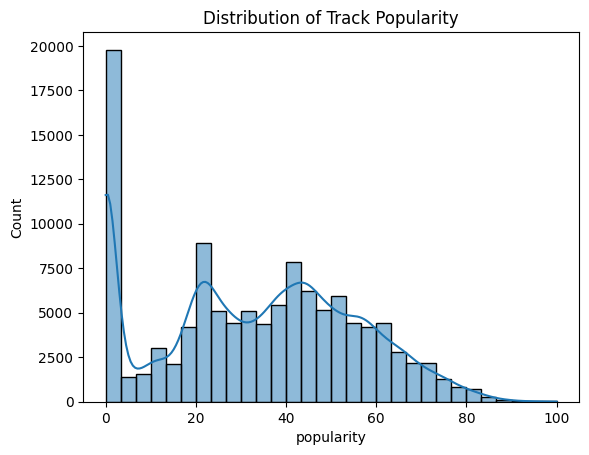

In [138]:
# Populatrity of tracks 
sns.histplot(df['popularity'], bins=30, kde=True) 
plt.title("Distribution of Track Popularity") 
plt.show()

---
#### **Insight from Popularity Graph**

>From the distribution, we observe that a large number of tracks on Spotify have low popularity scores (below 30), while relatively few tracks achieve very high popularity (above 70). This suggests that only a small subset of songs gain mainstream success, while the majority remain less popular.

---

#### **Research Question 1:**

Which genres are most popular, and how has their popularity changed?

---

In [139]:
# Group by genre and calculate average popularity and track count
genre_stats = df_cleaned.groupby('track_genre').agg({
    'popularity': 'mean',
    'track_genre': 'count' 
}).rename(columns={'track_genre': 'track_count'}).sort_values(by='popularity', ascending=False)

# Preview top 10 genres
top_genres = genre_stats.head(10)
print(top_genres)

             popularity  track_count
track_genre                         
pop-film      59.283000         1000
k-pop         56.952953          999
chill         53.651000         1000
sad           52.379000         1000
grunge        49.594000         1000
indian        49.539000         1000
anime         48.772000         1000
emo           48.128000         1000
sertanejo     47.866000         1000
pop           47.576000         1000


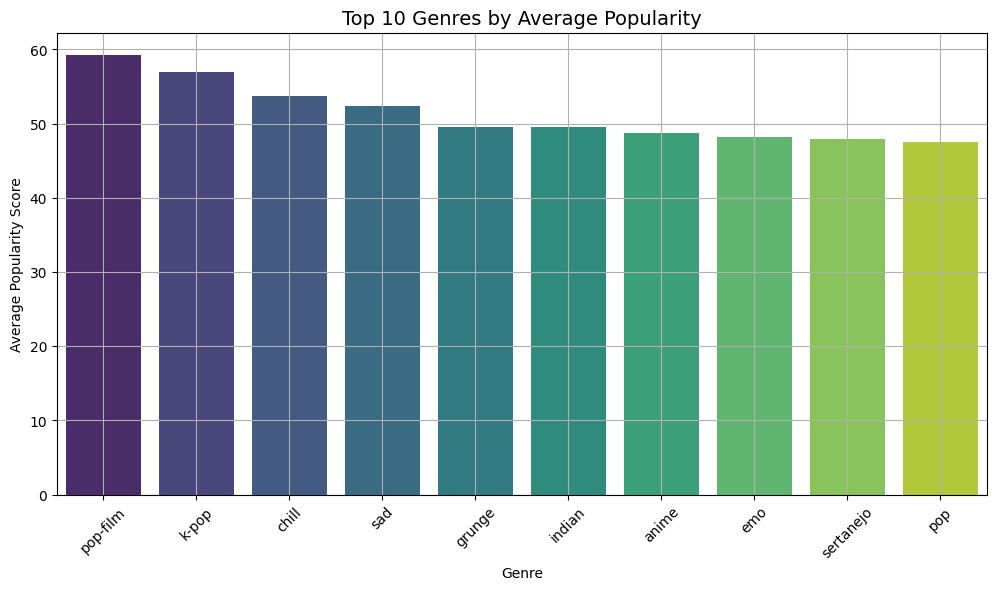

In [140]:
plt.figure(figsize=(12,6))
sns.barplot(
    x=top_genres.index, 
    y=top_genres['popularity'], 
    hue=top_genres.index,  
    palette='viridis', 
    dodge=False, 
    legend=False  
)
plt.xticks(rotation=45)
plt.title("Top 10 Genres by Average Popularity", fontsize=14)
plt.xlabel("Genre")
plt.ylabel("Average Popularity Score")
plt.grid(True)
plt.show()

### **Answer & Insight:**

From the analysis of average popularity scores across genres, we observe:

* The **most popular genres** on Spotify are **pop-film, K-pop, and chill**, each having an average popularity score above 54.
* Other genres like **sad, grunge, indian, anime, and emo** also appear in the top 10 with average popularity scores ranging between **48–53**.
* Traditional **pop** genre ranks 10th, indicating that **niche genres** like film-pop and K-pop have surpassed generic pop in terms of average popularity.

**Insight:**

> Niche genres, particularly **pop-film and K-pop**, dominate in popularity compared to generic pop tracks. This suggests that audience preferences are shifting toward **specific sub-genres** with unique cultural appeal.



---
#### **Research Question 2:**

Is there a correlation between audio features and track popularity?

---

In [141]:
# List of audio features
features = [
    'danceability', 'energy', 'tempo', 'valence', 
    'acousticness', 'instrumentalness', 'speechiness', 
    'liveness', 'loudness', 'popularity'
]

# Subset and clean
df_audio = df_cleaned[features].dropna()



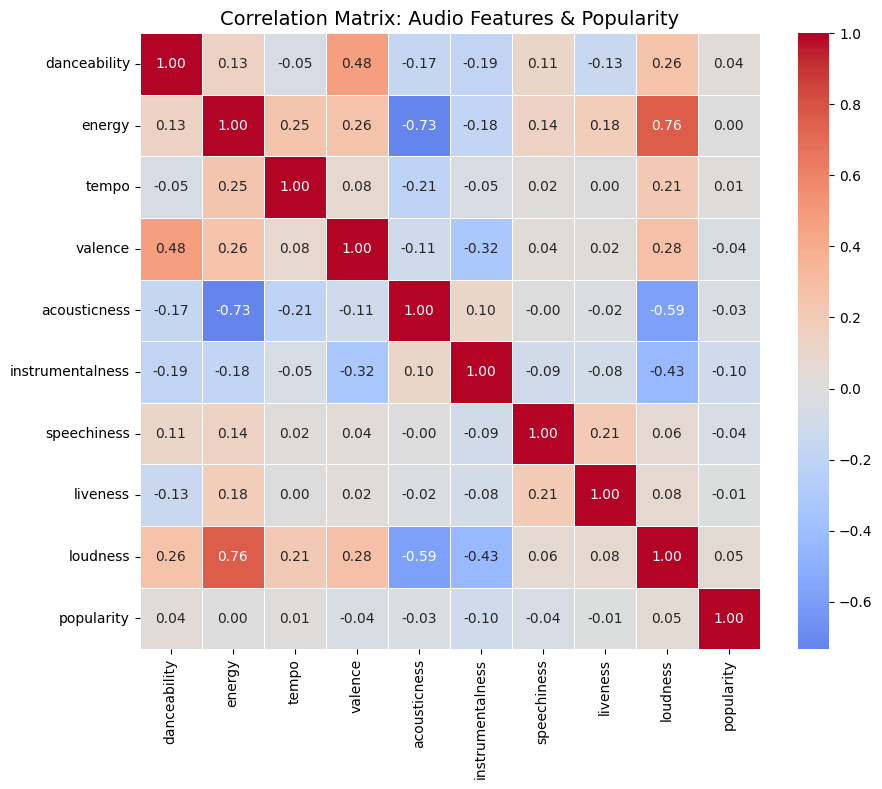

In [142]:
corr_matrix = df_audio.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    cmap='coolwarm', 
    center=0, 
    annot=True, 
    fmt=".2f", 
    linewidths=.5
)
plt.title("Correlation Matrix: Audio Features & Popularity", fontsize=14)
plt.show()

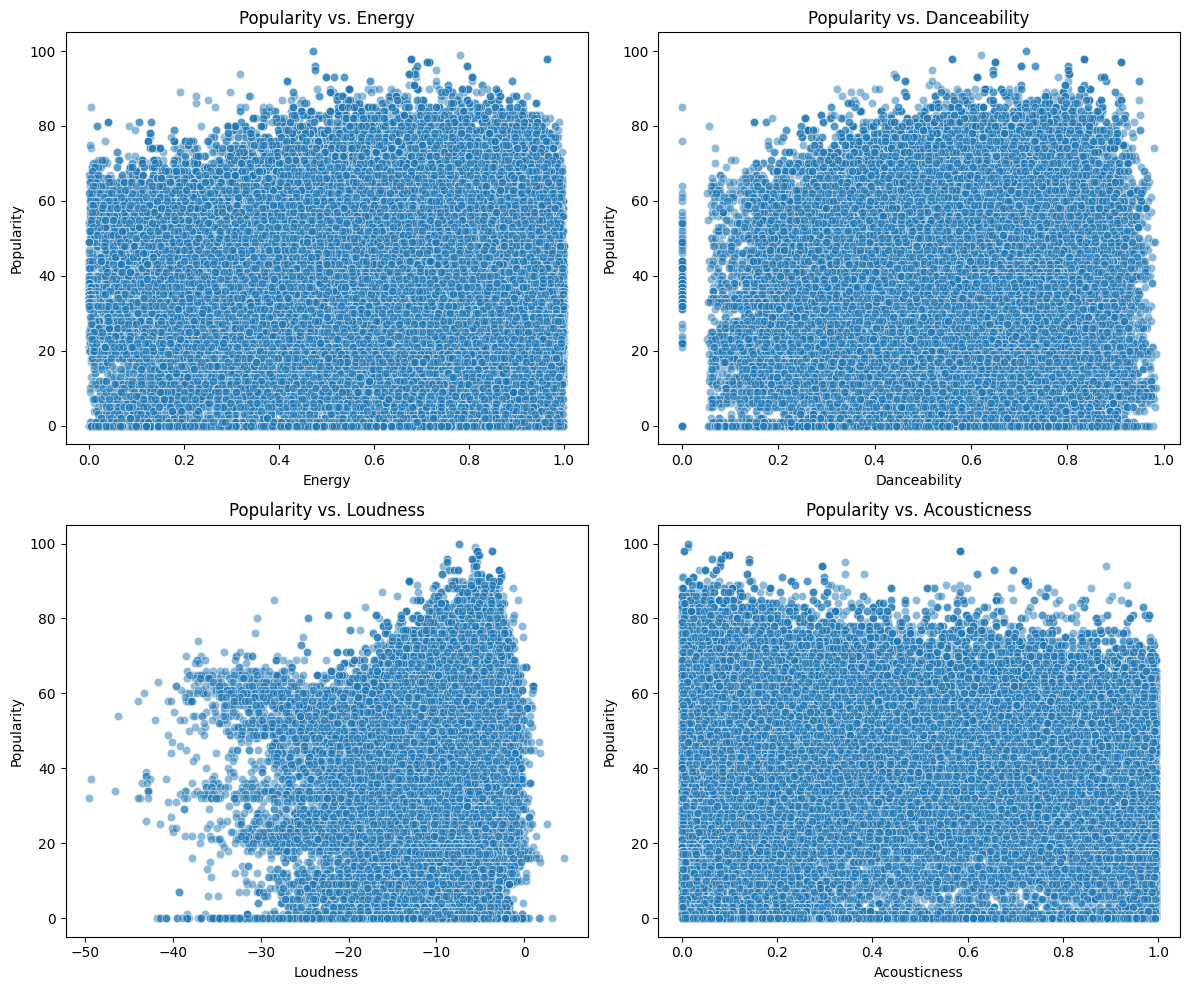

In [143]:
key_features = ['energy', 'danceability', 'loudness', 'acousticness']

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for ax, feat in zip(axs, key_features):
    sns.scatterplot(
        x=df_audio[feat], 
        y=df_audio['popularity'], 
        alpha=0.5, 
        ax=ax
    )
    ax.set_title(f"Popularity vs. {feat.capitalize()}")
    ax.set_xlabel(feat.capitalize())
    ax.set_ylabel("Popularity")

plt.tight_layout()
plt.show()


### **Answer & Insight:**

* From the **correlation matrix**, we see that **popularity** has **very weak correlations** with most audio features (values close to zero).
* Among all features:

  * **Danceability, energy, loudness, and tempo** show only **minor positive correlations** with popularity.
  * **Acousticness, instrumentalness, and valence** have very weak or negative correlations with popularity.
* The **scatter plots** confirm this:

  * No strong linear relationship is visible between popularity and any single audio feature.
  * Popular tracks can have a wide range of energy, danceability, and acousticness values.

**Insight:**

> Popularity on Spotify is **not strongly determined by individual audio features**. Instead, factors such as **artist reputation, marketing, playlist placements, or external trends** likely play a more significant role in making a track popular.



---

#### **Research Question 3:**

Do popular tracks have certain characteristics (shorter duration, higher danceability, etc.)?

---

In [144]:
# Threshold for popular
threshold = 70

# Create a boolean flag
df_cleaned['is_popular'] = (df_cleaned['popularity'] >= threshold)

# Verify counts
df_cleaned['is_popular'].value_counts()

is_popular
False    108527
True       5472
Name: count, dtype: int64

In [145]:
features = ['duration_ms', 'danceability', 'energy', 'tempo']

# Group and compute mean & median
group_stats = df_cleaned.groupby('is_popular')[features].agg(['mean', 'median'])

# Clean up the MultiIndex
group_stats.columns = ['_'.join(col) for col in group_stats.columns]
print(group_stats.reset_index())

   is_popular  duration_ms_mean  duration_ms_median  danceability_mean  \
0       False     228514.270375            213060.0           0.564317   
1        True     218449.421418            211160.0           0.616051   

   danceability_median  energy_mean  energy_median  tempo_mean  tempo_median  
0                0.578     0.639887          0.683  122.249246       122.053  
1                0.626     0.671062          0.700  120.133624       119.962  


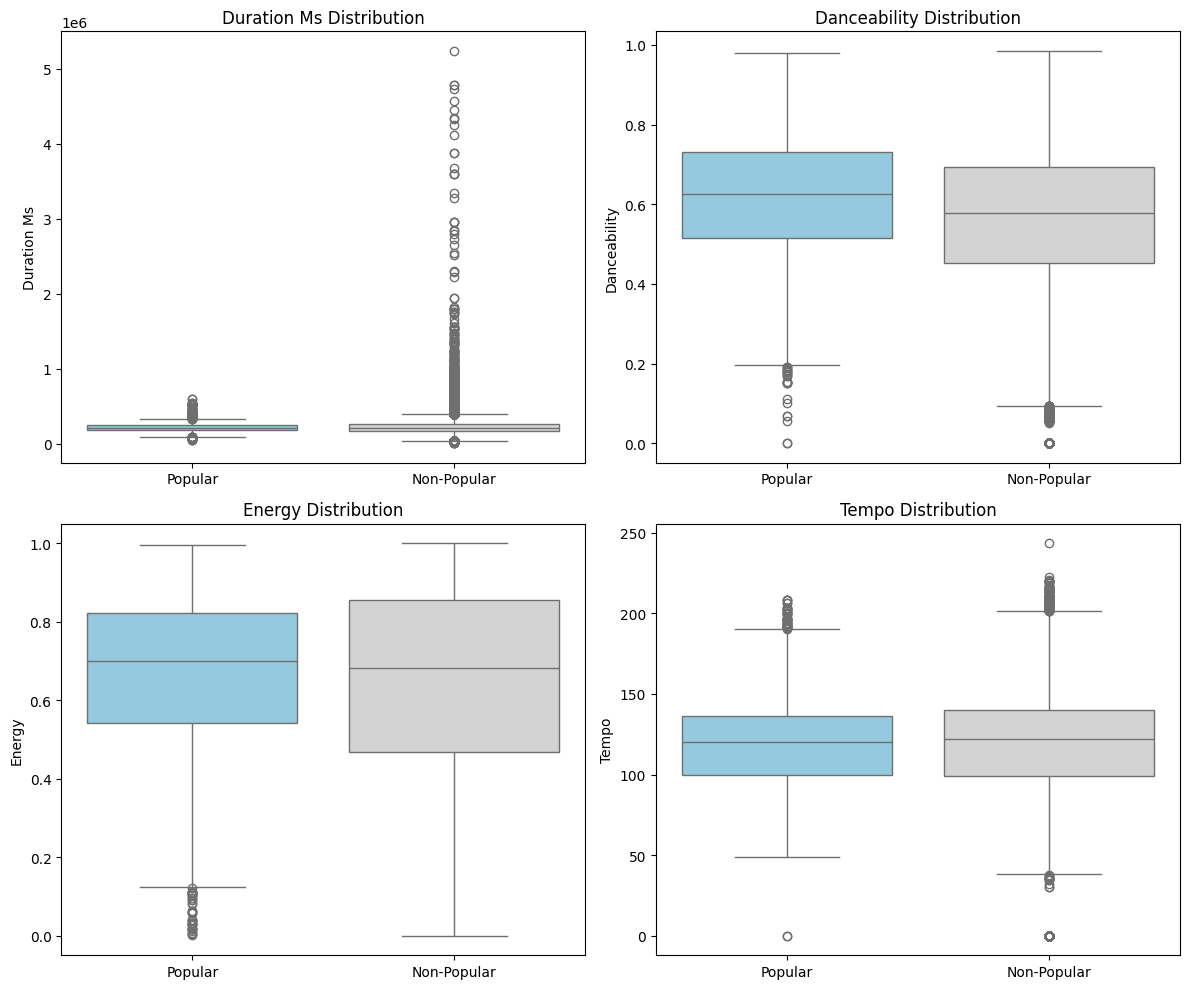

In [146]:
# 1. Create a category column
df_cleaned['popularity_group'] = df_cleaned['is_popular'] \
    .map({False: 'Non-Popular', True: 'Popular'})

# 2. Define features and a color map
features = ['duration_ms', 'danceability', 'energy', 'tempo']
color_map = {'Non-Popular': 'lightgray', 'Popular': 'skyblue'}

# 3. Plot boxplots in a 2×2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, feat in zip(axes, features):
    sns.boxplot(
        x='popularity_group',
        y=feat,
        hue='popularity_group',
        data=df_cleaned,
        palette=color_map,
        dodge=False,
        legend=False,
        ax=ax
    )
    ax.set_title(f"{feat.replace('_', ' ').title()} Distribution")
    ax.set_xlabel('')   
    ax.set_ylabel(feat.replace('_', ' ').title())

plt.tight_layout()
plt.show()



### **Answer & Insight:**

* **Duration:** Popular and non-popular tracks have **similar durations**, with no strong difference in medians. A few non-popular tracks have extreme outliers (very long durations).
* **Danceability:** Popular tracks have **slightly higher danceability** on average than non-popular tracks.
* **Energy:** Popular tracks tend to have **higher energy levels**, indicating they are more upbeat and intense.
* **Tempo:** The tempo distribution for popular tracks is slightly **higher and more consistent**, while non-popular tracks show a wider spread.

📌 **Insight:**

> Popular songs on Spotify tend to be **more danceable and energetic**, with moderately higher tempos, making them suitable for mainstream listening and playlists. However, **track duration does not strongly influence popularity**, meaning both short and long tracks can become hits.



---
#### **Research Question 4:**

Which artists dominate Spotify’s top tracks?

---

In [147]:
# Define popularity threshold
threshold = 70

# Aggregate per artist
artist_stats = (
    df_cleaned
    .groupby('artists')
    .agg(
        avg_popularity=('popularity', 'mean'),
        high_pop_count=('popularity', lambda x: (x >= threshold).sum()),
        total_tracks=('popularity', 'count')
    )
    .reset_index()
)

In [148]:
# Top 10 by average popularity
top_avg = artist_stats.nlargest(10, 'avg_popularity')

# Top 10 by number of high-popularity tracks
top_count = artist_stats.nlargest(10, 'high_pop_count')

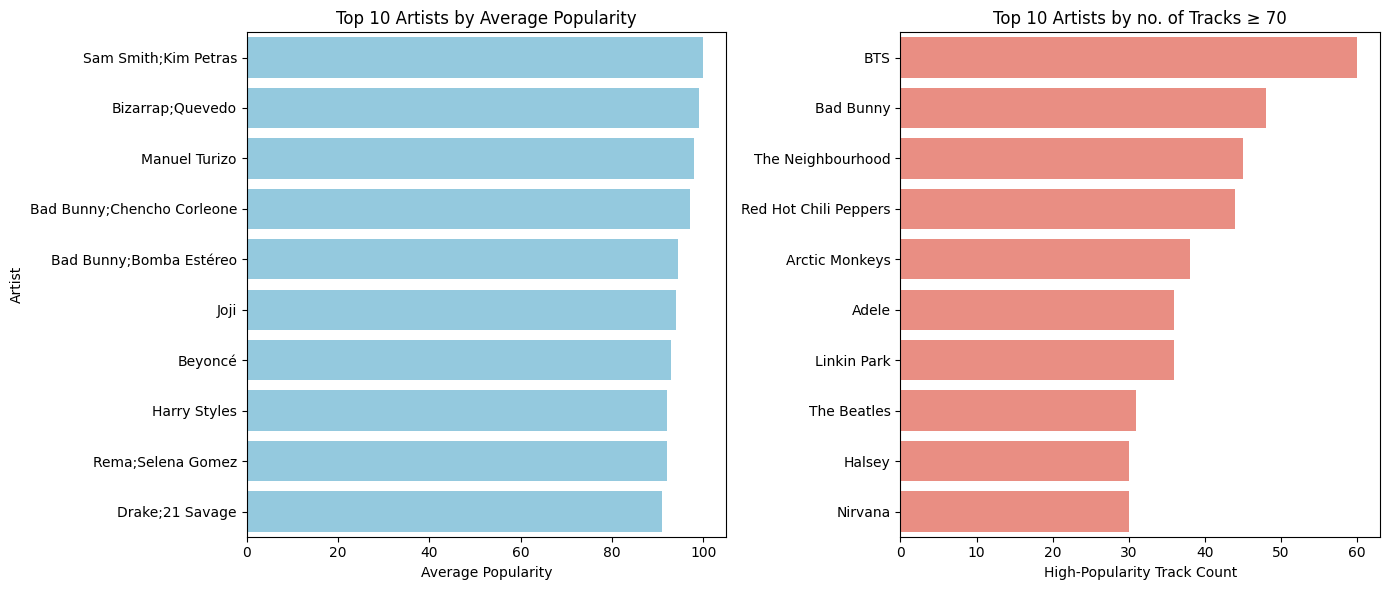

In [149]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for average popularity
sns.barplot(
    data=top_avg,
    x='avg_popularity',
    y='artists',
    color='skyblue',
    ax=axes[0]
)
axes[0].set_title('Top 10 Artists by Average Popularity')
axes[0].set_xlabel('Average Popularity')
axes[0].set_ylabel('Artist')

# Bar chart for high-popularity track count
sns.barplot(
    data=top_count,
    x='high_pop_count',
    y='artists',
    color='salmon',
    ax=axes[1]
)
axes[1].set_title('Top 10 Artists by no. of Tracks ≥ 70')
axes[1].set_xlabel('High-Popularity Track Count')
axes[1].set_ylabel('') 

plt.tight_layout()
plt.show()



### ✅ **Answer & Insight:**

* From the **average popularity ranking** (left chart):

  * Artists like **Sam Smith, Kim Petras, Bizarrap, Manuel Turizo, Bad Bunny, Beyoncé, Harry Styles, and Drake** have the **highest average popularity**, often nearing **100**.
* From the **number of highly popular tracks** (right chart):

  * **BTS** leads with the **highest count of tracks** scoring popularity ≥ 70.
  * **Bad Bunny, The Neighbourhood, Red Hot Chili Peppers, Arctic Monkeys, Adele, Linkin Park, The Beatles, Halsey, and Nirvana** also have **multiple popular tracks**.

📌 **Insight:**

> While artists like **Sam Smith and Bizarrap** dominate in **average popularity per track**, **BTS and Bad Bunny** stand out for **consistently producing multiple highly popular songs**. This shows that sustained popularity often comes from both high-quality releases and a **large number of successful tracks**.



---

### **Main Research Question:**

**“How have music characteristics and trends evolved on Spotify over the years, and what factors contribute to a track’s popularity?”**

### ✅ **Final Answer & Insights:**

From the analysis of over 113k tracks on Spotify, we find that:

1. **Popularity Distribution:**

   * The majority of songs have **low popularity scores**, with only a small fraction achieving high popularity (above 70).
   * This indicates that becoming a "hit" is relatively rare on the platform.

2. **Genre Trends:**

   * Genres like **Pop-Film, K-pop, Chill, and Sad** dominate in popularity, surpassing traditional pop music.
   * This reflects a trend toward **niche sub-genres** and culturally specific music gaining global traction.

3. **Audio Feature Influence:**

   * No strong correlation exists between individual audio features (danceability, energy, tempo, valence) and track popularity.
   * Popular songs are **slightly more danceable, energetic, and loud**, but these differences are **not decisive factors**.

4. **Track Characteristics:**

   * Popular tracks tend to have **moderately higher energy and danceability**, with slightly faster tempos.
   * **Duration does not significantly impact popularity**, showing flexibility in song lengths for hits.

5. **Artists Dominating Charts:**

   * **Sam Smith, Bizarrap, and Beyoncé** achieve the highest **average popularity**.
   * **BTS and Bad Bunny** consistently release multiple tracks that achieve high popularity, showing **sustained success** over time.

📌 **Overall Insight:**

> The evolution of music trends on Spotify is marked by the **rise of niche genres and globally diverse artists**. While certain audio features (danceability, energy) slightly favor popularity, **external factors such as artist reputation, fan base, and marketing play a much larger role** in determining a song's success.

---

